In [2]:
""" Import necessary libraries. """
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as PP

mpl.style.use('seaborn-poster') # make plots look nice

This tests whether integration of hypsometric equation for a standard atmosphere seems reasonable.

$$ p(z) = p_s \left( \frac{T_s + \Gamma z}{T_s} \right) ^ \frac{-g}{R_d \Gamma} $$

In [3]:
def pressure_from_height(z, gamma = -6.5e-3, t_s = 288.15, p_s = 101324.0):
    """ Gives pressure as a function of height, assuming a standard atmosphere.
    
        input:
        ------
        
            z     : a height array (in m)
            
            gamma : the lapse rate (in K/m)
            
            t_s   :   the surface temperature (in K)
            
            p_s   : surface pressure (in Pa)
            
            
        output:
        -------
        
            an array of pressures
    """
    
    Rd = 287. # gas constant for dry, Earth air: [J/kg/K]
    g = 9.81 # gravity [m/s/s]
    
    p = p_s*((t_s + gamma*z)/t_s)**(-g/(Rd * gamma))
    
    return p   

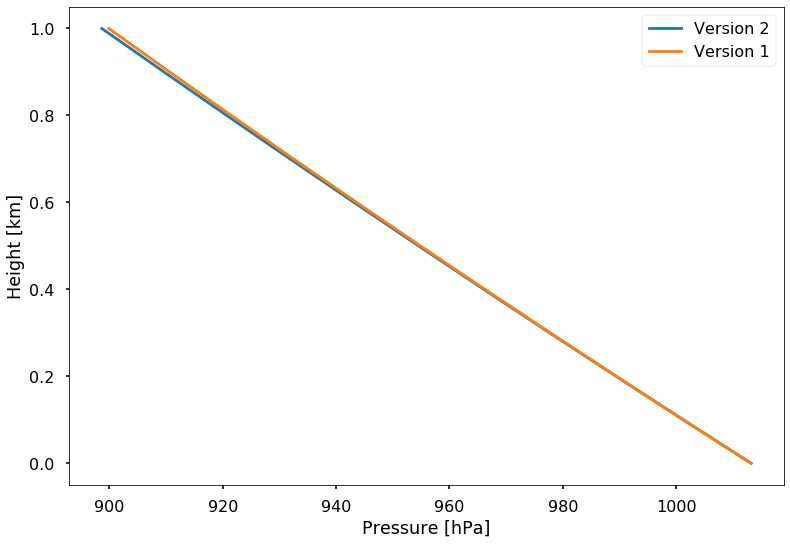

In [4]:
""" Test the function"""

# make a z array
z = np.array([0, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000])

# calculate pressure
p = pressure_from_height(z)

g = 9.81
Rd = 287
T = 288.15
p_s = 101324
p_ref = p_s * np.exp(-g*z/(Rd*T))

   # plot the graph

fig, ax = PP.subplots()

ax.plot(p/100, z/1000, label = "Version 2")

ax.plot(p_ref/100, z/1000, label = "Version 1")

ax.set_xlabel("Pressure [hPa]")
ax.set_ylabel("Height [km]")

# add a legend
ax.legend(loc = 'best')

# draw the plot
PP.show()